In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
gastos = pd.read_csv('C:\\Data Engineer\\military_expenditure_202403110030.csv', delimiter=',', header=0)

In [56]:
gastos

,Name,Code,Type,Indicator Name,year,Valor
0,World,WLD,Regions Clubbed Geographically,Military expenditure (current USD),2018,178000000000000
1,World,WLD,Regions Clubbed Geographically,Military expenditure (current USD),2012,174000000000000
2,World,WLD,Regions Clubbed Geographically,Military expenditure (current USD),2013,174000000000000
3,World,WLD,Regions Clubbed Geographically,Military expenditure (current USD),2014,174000000000000
4,World,WLD,Regions Clubbed Geographically,Military expenditure (current USD),2011,173000000000000
...,...,...,...,...,...,...
9236,Panama,PAN,Country,Military expenditure (current USD),2014,0
9237,Panama,PAN,Country,Military expenditure (current USD),2015,0
9238,Panama,PAN,Country,Military expenditure (current USD),2016,0
9239,Panama,PAN,Country,Military expenditure (current USD),2017,0


In [25]:
testes = pd.read_csv('C:\\Data Engineer\\tests.csv', delimiter=',')

In [70]:
testes

,country_name,year,nuclear_weapons_tests
0,China,1945,0
1,China,1946,0
2,China,1947,0
3,China,1948,0
4,China,1949,0
...,...,...,...
595,United States,2015,0
596,United States,2016,0
597,United States,2017,0
598,United States,2018,0


In [74]:
testes_decades = testes.groupby(testes['year'] // 10 * 10)['nuclear_weapons_tests'].sum()

In [75]:
testes_decades

year
1940      7
1950    291
1960    706
1970    550
1980    439
1990     57
2000      2
2010      7
Name: nuclear_weapons_tests, dtype: int64

In [26]:
estoque = pd.read_csv('C:\\Data Engineer\\stockpiles.csv', delimiter=',')

In [76]:
stockpile_9 = estoque[estoque['year'] % 10 == 9]

In [77]:
estoque_decades = stockpile_9.groupby(stockpile_9['year'] // 10 * 10)['nuclear_weapons_stockpile'].sum()

In [78]:
estoque_decades

year
1940      171
1950    13424
1960    38621
1970    53355
1980    58342
1990    24881
2000    11635
2010     9325
Name: nuclear_weapons_stockpile, dtype: int64

In [62]:
decades = range(1940, 2010, 10) 

In [63]:
print(decades)

range(1940, 2010, 10)


In [57]:
gastos

,Name,Code,Type,Indicator Name,year,Valor
0,World,WLD,Regions Clubbed Geographically,Military expenditure (current USD),2018,178000000000000
1,World,WLD,Regions Clubbed Geographically,Military expenditure (current USD),2012,174000000000000
2,World,WLD,Regions Clubbed Geographically,Military expenditure (current USD),2013,174000000000000
3,World,WLD,Regions Clubbed Geographically,Military expenditure (current USD),2014,174000000000000
4,World,WLD,Regions Clubbed Geographically,Military expenditure (current USD),2011,173000000000000
...,...,...,...,...,...,...
9236,Panama,PAN,Country,Military expenditure (current USD),2014,0
9237,Panama,PAN,Country,Military expenditure (current USD),2015,0
9238,Panama,PAN,Country,Military expenditure (current USD),2016,0
9239,Panama,PAN,Country,Military expenditure (current USD),2017,0


In [65]:
gastos_filtered = gastos[gastos['Type'] == 'Country']

In [98]:
gastos_decades = gastos_filtered.groupby(gastos_filtered['year'] // 10 * 10)['Valor'].sum()

decades_pct_change = gastos_decades.pct_change() * 100

# Shift results down by one (as the first decade has no prior reference)
decades_pct_change = decades_pct_change.shift(periods=-1) 

# Display the results from the 1950s onwards (since the 1940s value won't have a comparison)
decades_pct_change[1950:]

Series([], Name: Valor, dtype: float64)

In [96]:
gastos_decades

year
1960      3013335553469
1970     37286756177004
1980    244026767858707
1990    292590251281516
2000    492699172214559
2010    759749138479663
Name: Valor, dtype: int64

In [99]:
decades_pct_change

year
1960    1137.391439
1970     554.459634
1980      19.900884
1990      68.392204
2000      54.201424
2010            NaN
Name: Valor, dtype: float64

In [72]:
gastos_decades = decades

In [73]:
gastos_decades

year
1960      3013335553469
1970     37286756177004
1980    244026767858707
1990    292590251281516
2000    492699172214559
2010    759749138479663
Name: Valor, dtype: int64

In [64]:
decades = gastos.groupby(gastos['year'] // 10)['Valor'].sum()

print(decades)

year
196      108817132670699
197      587078433444246
198     2277002557303498
199     3789958999101300
200     6750869803136364
201    10584125643553175
Name: Valor, dtype: int64


In [81]:
estoque_decades

year
1940      171
1950    13424
1960    38621
1970    53355
1980    58342
1990    24881
2000    11635
2010     9325
Name: nuclear_weapons_stockpile, dtype: int64

In [80]:
testes_decades

year
1940      7
1950    291
1960    706
1970    550
1980    439
1990     57
2000      2
2010      7
Name: nuclear_weapons_tests, dtype: int64

In [79]:
gastos_decades

year
1960      3013335553469
1970     37286756177004
1980    244026767858707
1990    292590251281516
2000    492699172214559
2010    759749138479663
Name: Valor, dtype: int64

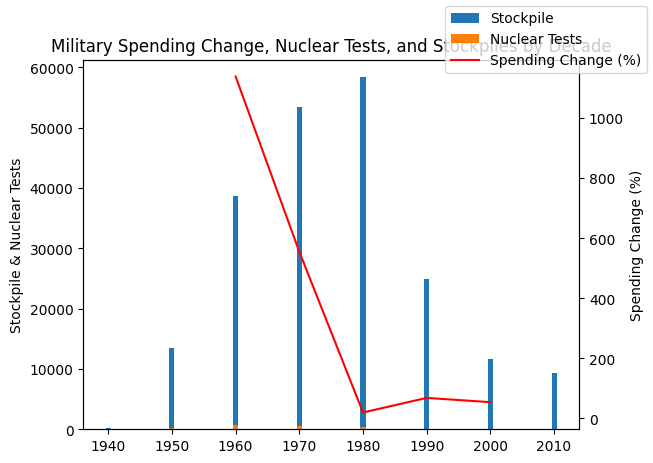

In [110]:
combined_data = pd.concat([decades_pct_change, testes_decades, estoque_decades], axis=1)
combined_data.columns = ['spending_pct_change', 'tests', 'stockpile']




fig, ax1 = plt.subplots()  


ax1.bar(combined_data.index, combined_data['stockpile'], label='Stockpile')
ax1.bar(combined_data.index, combined_data['tests'], label='Nuclear Tests')
ax1.set_ylabel('Stockpile & Nuclear Tests') 

 
ax2 = ax1.twinx() 
ax2.plot(combined_data.index, combined_data['spending_pct_change'], color='red', label='Spending Change (%)')
ax2.set_ylabel('Spending Change (%)')

 
plt.xlabel('Decades')
plt.title('Military Spending Change, Nuclear Tests, and Stockpiles by Decade')
fig.legend()  

plt.show()

Nesse gráfico temos o cruzamento de 3 sets de dados:

* Azul: somatória do estoque de ogivas nucleares do países ao final de cada década
* Laranja: soma do número de testes com armas nucleares por década
* Vermelho: % da diferença dos gastos totais em armamentos entre uma década e outra


Conclusões e insights obtidos:
* Após o descobrimento da fissão nuclear e a invenção da primeira bomba atômica (Projeto Manhattan - retratada no último ganhador de Oscar "Oppenheimer"), iniciou-se uma corrida armamentista para o desenvolvimento de novas e mais bombas nucleares;
* Especialmente entre os anos 40 e 70, os investimentos no desenvolvimento, testes e produção de bombas nucleares foi desproporcionalmente alto em relação às decadas seguintes ;
* Com o crescente avanço dos Arsenais nos anos 80, com a opinião pública e governos iniciando acordos de não proliferação (SALT), as grandes potências começaram a desmantelar seus arsenais nucleares;
* Com a queda da União Soviética e assinatura do acordo START I em 1991, houve forte redução do estoque de armamentos nucleares no mundo à partir de então;
* No entanto, os gastos com armamentos militares continuaram a aumentar ao redor do mundo nas décadas seguintes, com as potências nucleares mantendo estoques de bombas nucleares e investindo em novas tecnologias (desde tanques e aviões a misseis balísticos e de defesa anti-mísseis), os quais são caros;
* Os dados mais recentes indicam aumento significativo dos gastos militares da Rússia e da China, o que colocou o mundo em alerta novamente, o que poderá acarretar uma nova corrida armamentista no futuro próximo;